In [277]:
import numpy as np
import pandas as pd
import scipy.linalg
import sympy
import matplotlib.pyplot as plt

# Проводим измерения по времени.

Время работы поиска кратчайшего пути в неориентированных графах я замеряла для следующих алгоритмов:
1. Алгоритм Дейкстры;
2. Алгоритм Флойда-Уоршела;
3. Алгоритм Форда-Беллмана;
4. Алгоритм Левита

### Результаты измерений по времени для полных графов с числом вершин от 10 до 1010 (шаг 50) по каждому из четырёх приведённых выше алгоритмов:

In [278]:
display(pd.read_csv("complete_graphs.csv"))

,number of vertex,number of edges,Dijkstra,Floyd–Warshall,Bellman–Ford,Levit,Unnamed: 6
0,10,45,121200,121700,31000,354400,NaN
1,60,1770,3077800,13640900,725000,951400,NaN
2,110,5995,12583000,91175200,3303300,2109300,NaN
3,160,12720,24327400,268550900,3244500,6471300,NaN
4,210,21945,45829500,615776200,5516900,7435000,NaN
5,260,33670,68692100,1142916400,8142800,11159100,NaN
6,310,47895,94827300,2015777300,11526800,16924300,NaN
7,360,64620,131322900,3092959600,12890100,18268400,NaN
8,410,83845,177301500,4428387000,19623000,28062900,NaN
9,460,105570,206153400,6583707200,26727600,38227400,NaN


### Результаты измерений по времени для связных графов с числом вершин от 10 до 1010 (шаг 50) и коэффициентом плотности 0.4-0.5 по каждому из четырёх приведённых выше алгоритмов:

In [279]:
display(pd.read_csv("connected_graphs.csv"))

,number of vertex,number of edges,Dijkstra,Floyd–Warshall,Bellman–Ford,Levit,Unnamed: 6
0,10,6,61600,63400,9500,14600,NaN
1,60,351,674300,4266300,172500,144100,NaN
2,110,1176,1791700,24818100,352100,430800,NaN
3,160,2556,4371600,79118200,676900,945700,NaN
4,210,4371,8546700,193626100,1434400,1707400,NaN
5,260,6786,13598000,344416100,1655200,2022400,NaN
6,310,9591,18316200,570369700,2446500,3277300,NaN
7,360,13041,1082300,981993700,1790100,1013600,NaN
8,410,16836,1682000,1357040600,4533300,2066400,NaN
9,460,21321,2120500,1936463700,3857500,3196500,NaN


### Результаты измерений по времени для разреженных связных графов (деревьев) с числом вершин от 10 до 1010 (шаг 50) по каждому из четырёх приведённых выше алгоритмов:

In [280]:
display(pd.read_csv("sparse_graphs.csv"))

,number of vertex,number of edges,Dijkstra,Floyd–Warshall,Bellman–Ford,Levit,Unnamed: 6
0,10,9,95000,129500,21200,28800,NaN
1,60,59,400500,10108300,91400,107500,NaN
2,110,109,640900,70669300,259700,305700,NaN
3,160,159,1201500,164942800,521500,522800,NaN
4,210,209,2384700,462785700,549100,277900,NaN
5,260,259,2207800,907120400,381200,486800,NaN
6,310,309,1777400,1585560600,1134800,1015000,NaN
7,360,359,3941900,2436574200,514900,628000,NaN
8,410,409,2314800,3593616700,577800,923400,NaN
9,460,459,2758100,5006156400,878500,843400,NaN


# Построим графики

## Графики зависимости отдельно по каждому алгоритму

### Графики времени работы от числа вершин отдельно по каждому алгоритму и по каждому типу графа

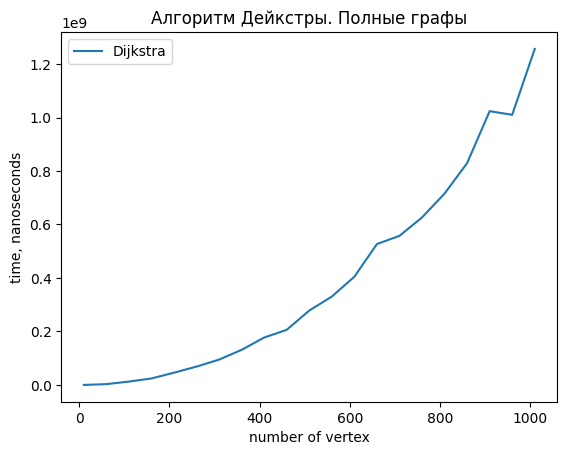

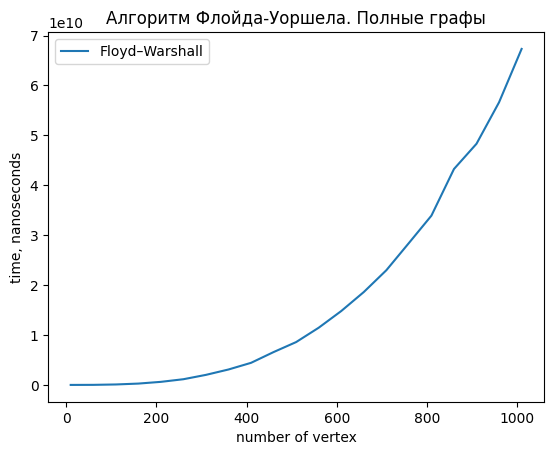

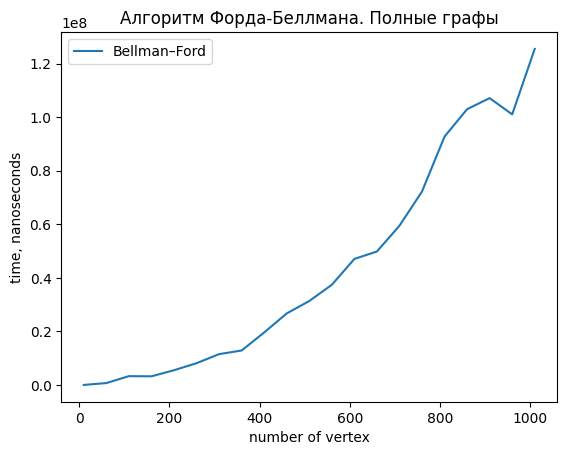

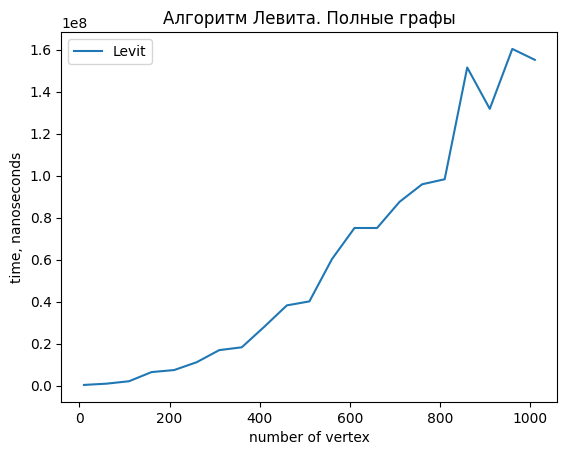

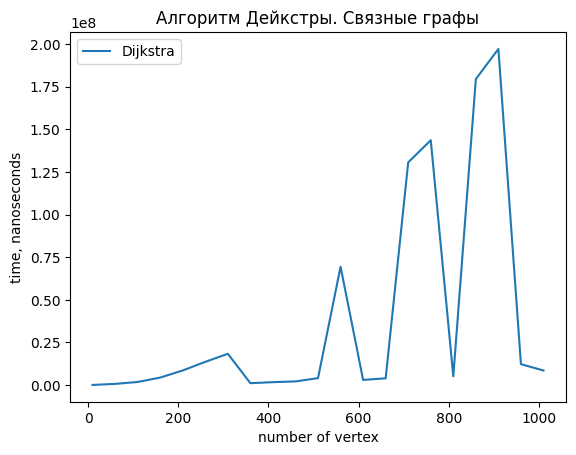

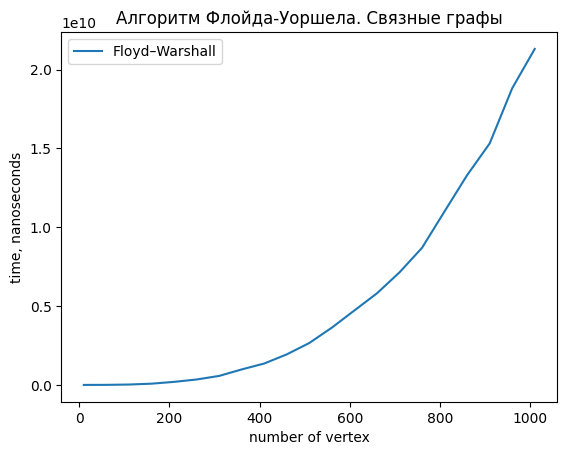

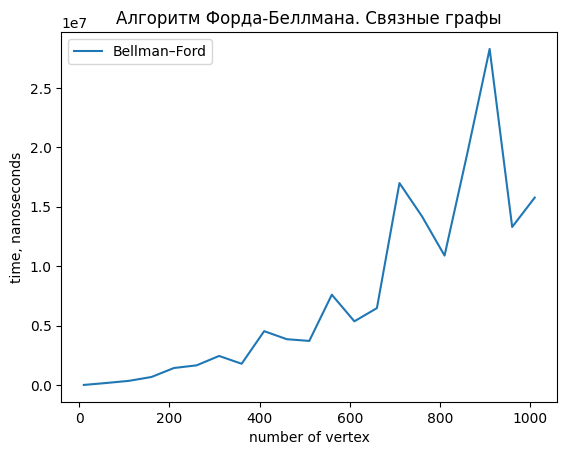

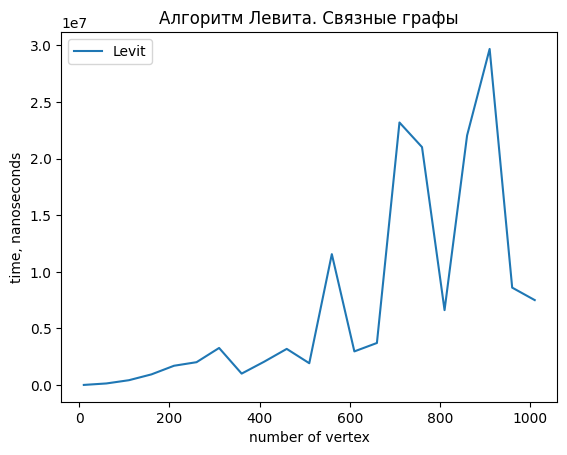

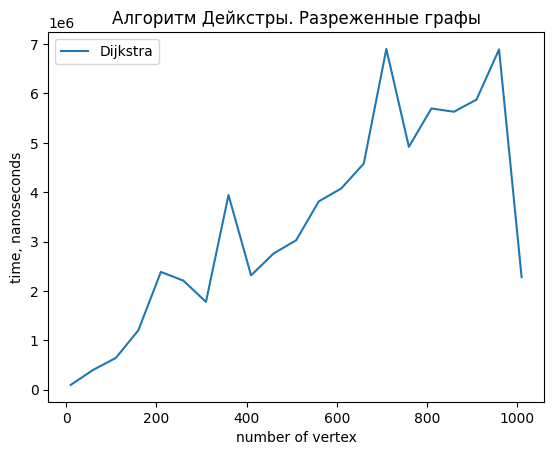

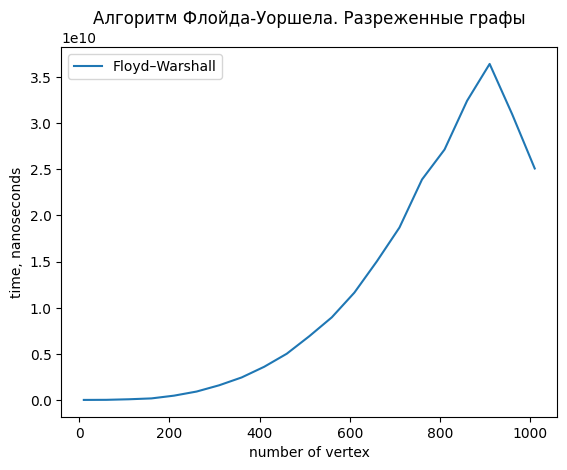

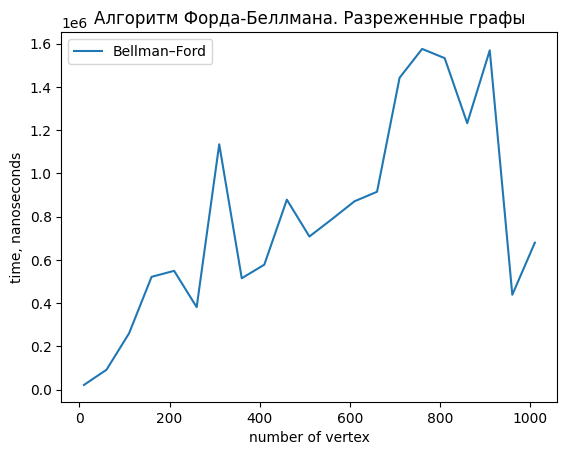

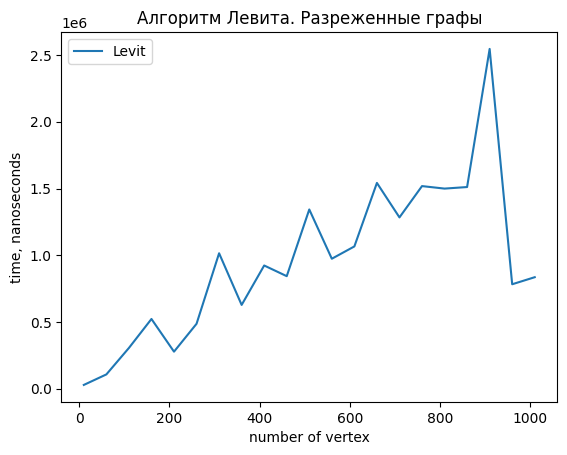

In [281]:
algorithm_names = ["Алгоритм Дейкстры", "Алгоритм Флойда-Уоршела", "Алгоритм Форда-Беллмана", "Алгоритм Левита"]
file_names = ["complete_graphs.csv", "connected_graphs.csv", "sparse_graphs.csv"]
file_leg_names = ["Полные графы", "Связные графы", "Разреженные графы"]
for files in range(len(file_names)):
  for i in range(len(algorithm_names)):
      i = i + 1
      df = pd.read_csv(file_names[files], index_col=0) # загрузка таблицы из файла, указываем нулевой столбец как индекс
      df = df.iloc[:, i]
      df.plot(kind='line') # построение графика
      plt.xlabel('number of vertex') # подпись оси x
      plt.ylabel('time, nanoseconds') # подпись оси y
      plt.title(algorithm_names[i - 1] + ". " + file_leg_names[files]) # заголовок графика
      plt.legend(loc='upper left') # легенда, где находятся линии на графике
      plt.show() # показать график

### Графики времени работы от числа рёбер отдельно по каждому алгоритму

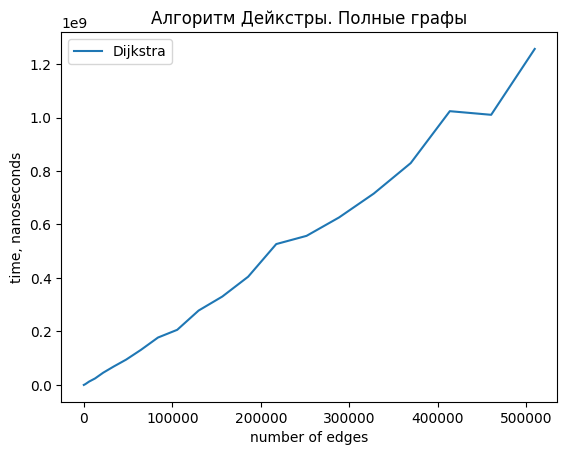

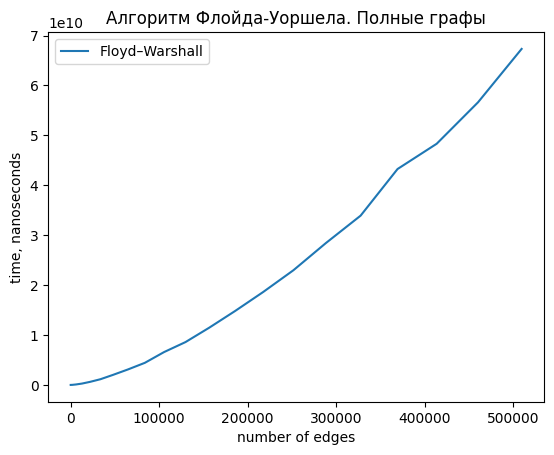

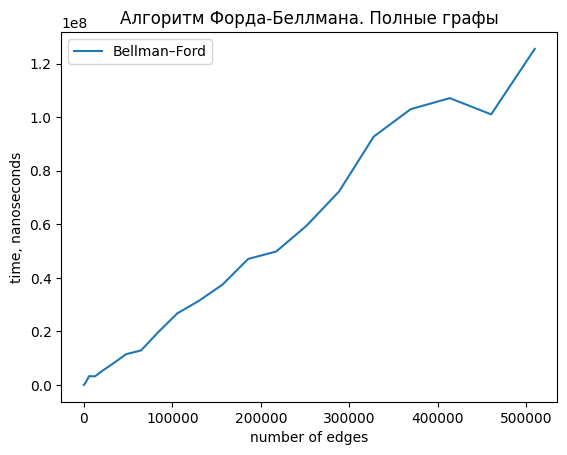

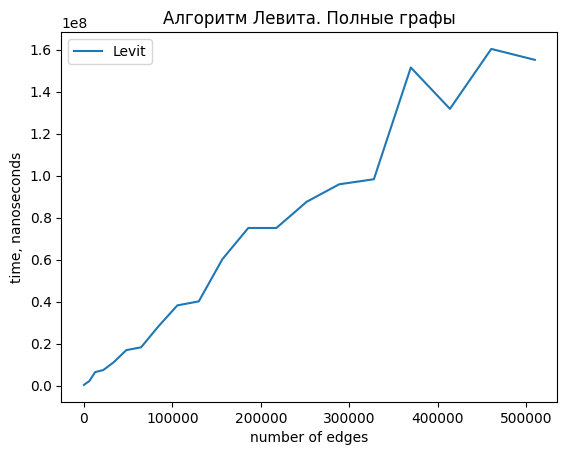

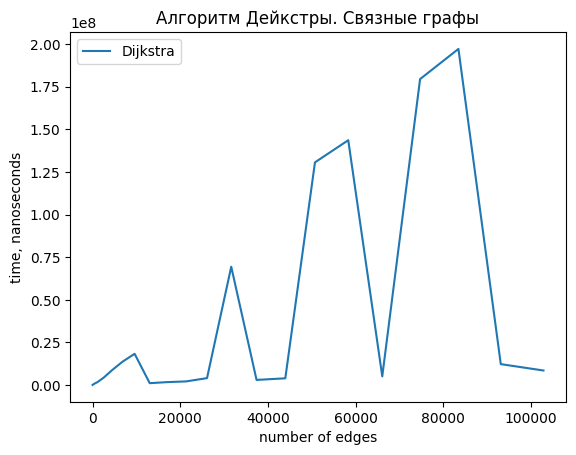

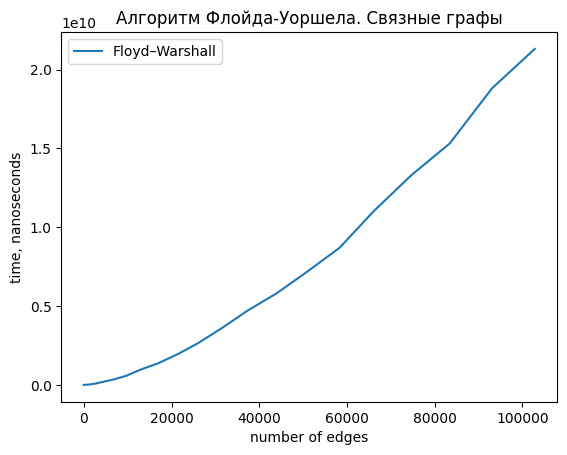

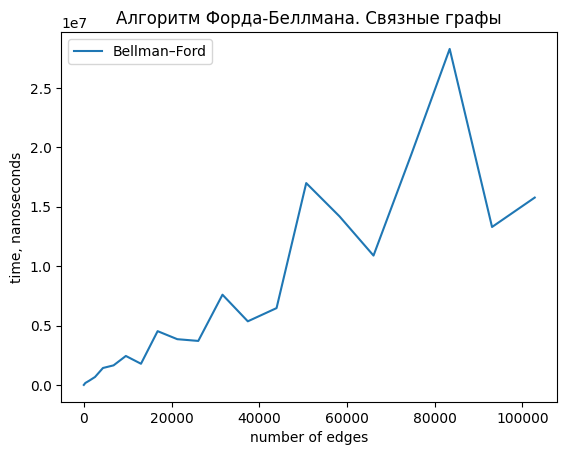

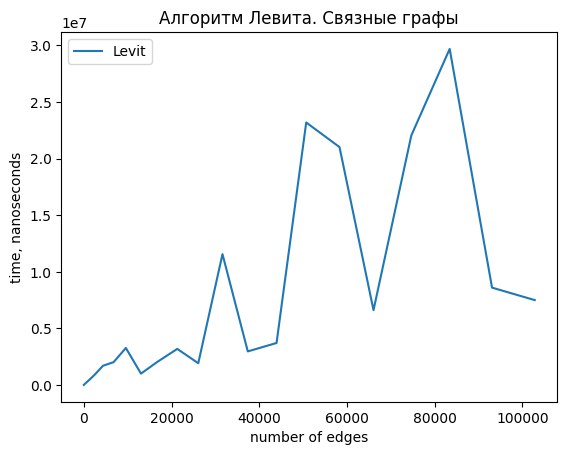

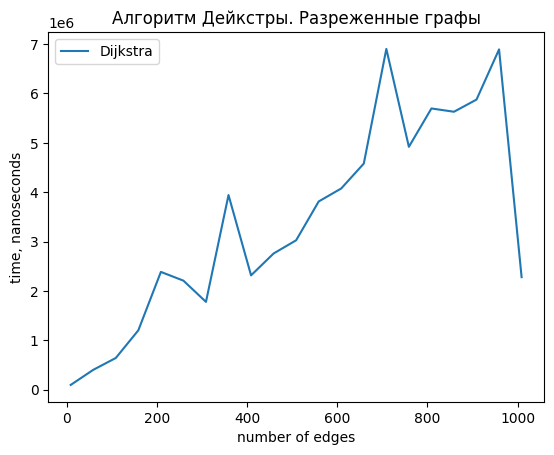

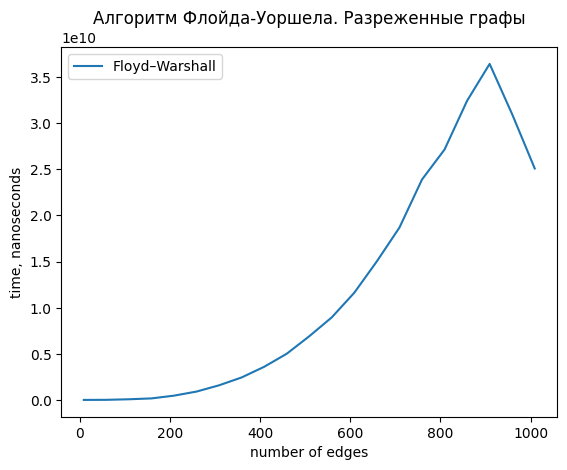

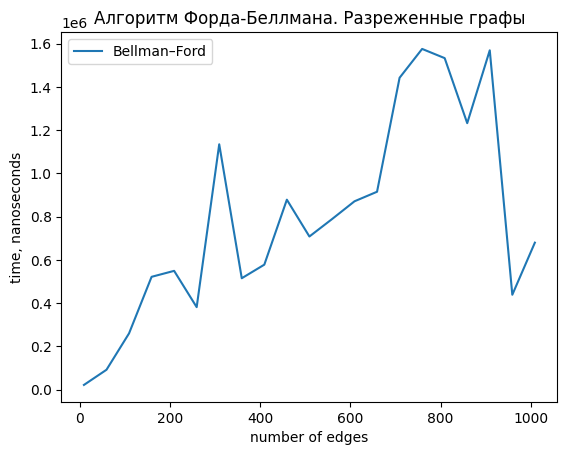

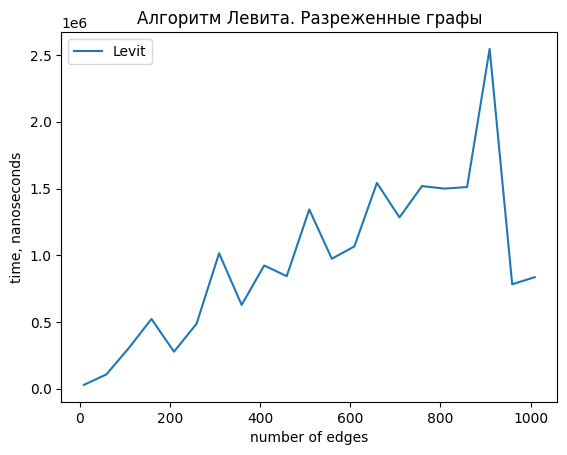

In [282]:
algorithm_names = ["Алгоритм Дейкстры", "Алгоритм Флойда-Уоршела", "Алгоритм Форда-Беллмана", "Алгоритм Левита"]
file_names = ["complete_graphs.csv", "connected_graphs.csv", "sparse_graphs.csv"]
file_leg_names = ["Полные графы", "Связные графы", "Разреженные графы"]
for files in range(len(file_names)):
  for i in range(len(algorithm_names)):
      i = i + 1
      df = pd.read_csv(file_names[files], index_col=1) # загрузка таблицы из файла, указываем первый столбец как индекс
      df = df.iloc[:, i]
      df.plot(kind='line') # построение графика
      plt.xlabel('number of edges') # подпись оси x
      plt.ylabel('time, nanoseconds') # подпись оси y
      plt.title(algorithm_names[i - 1] + ". " + file_leg_names[files]) # заголовок графика
      plt.legend(loc='upper left') # легенда, где находятся линии на графике
      plt.show() # показать график

Выводы:
1. Алгоритм Дейкстры имеет в моей реализации аспимптотику O(n^2 + m) как для плотных, так и для разреженных графов (n - количество вершин, m - количество рёбер). Сравнивая время работы данного алгоритма на разных графах (полных, связных с заданным коэффициентом точности и разреженных) можно убедиться в том, что алгоритм Дейкстры лучше работает на разреженных графах. Данное поведение вполне очевидно: в полных графах, где все вершины связаны между собой, данный алгоритм для каждой вершины смотрит все смежные к ней; в связных графах с заданным коэффициентом плотности равным  ~0.4-0.5 количество рёбер уменьшается, поэтому на втором типе графов алгоритм отрабатывает быстрее, чем на первом; в разреженных же графах количество рёбер ещё меньше и алгоритм Дейкстры работает быстрее всех именно на данном типе графа.

2. Алгоритм Флойда-Уоршела имеет асимптотику O(n^3) (n - количество вершин).Сравнивая время работы данного алгоритма на разных графах (полных, связных с заданным коэффициентом точности и разреженных) можно убедиться в том, что алгоритм Флойда-Уоршелла работает медленнее на полных графах, в сравнении с разреженными графами.

3. Алгоритм Беллмана-Форда имеет асимптотику O(n * m) (n - количество вершин, m - количество рёбер). На полных графах асимптотика O(n^3), на разреженных же -   O(n^2). Эта асимптотика также подтверждается и видна наших графах: хуже всех алгоритм работает для полных графов, затем идут связные с заданным коэффициентом плотности и затем разреженные графы. Этот факт довольно очевиден.

4. Алгоритм Левита имеет асимптотику O(n * m) (n - количество вершин, m - количество рёбер). Сравнивая время работы алгоритма Левита на разных графах (полных, связных с заданным коэффициентом точности и разреженных), можно увидеть, что алгоритм Левита лучше работает на разреженных графах. В полных графах, где все вершины связаны между собой, алгоритм Левита все равно должен просматривать все смежные вершины на каждой итерации. В связных графах с заданным коэффициентом плотности, количество рёбер уменьшается, поэтому алгоритм Левита работает быстрее, чем на полных графах. В разреженных графах, где количество рёбер ещё меньше, алгоритм Левита работает быстрее всех.

## Агрегированные графики

### График времени работы от числа вершин для всех графиков

In [283]:
def plot_table_1(file_path, title):
    df = pd.read_csv(file_path, index_col=0) # загрузка таблицы из файла, указываем первый столбец как индекс
    df = df.drop(df.columns[0], axis=1)
    df = df.iloc[:, :-1]
    df.plot(kind='line') # построение графика
    plt.xlabel('number of vertex') # подпись оси x
    plt.ylabel('time, nanoseconds') # подпись оси y
    plt.title(title) # заголовок графика
    plt.legend(loc='upper left') # легенда, где находятся линии на графике
    plt.show() # показать график

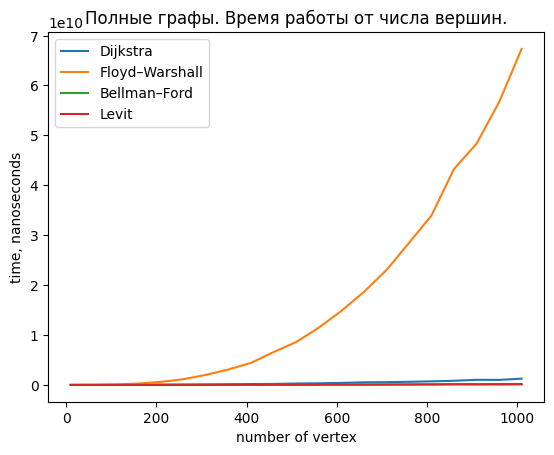

In [284]:
plot_table_1("complete_graphs.csv", "Полные графы. Время работы от числа вершин.")

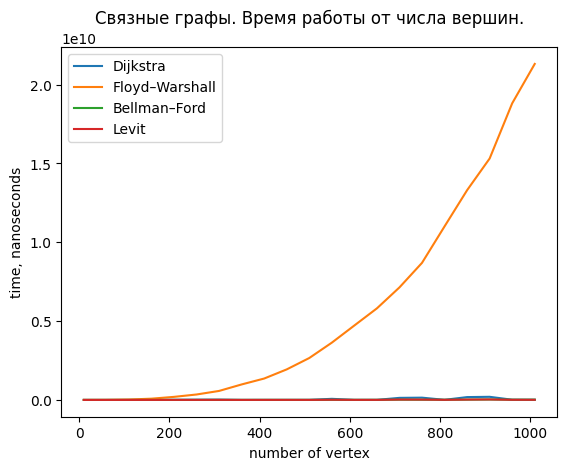

In [285]:
plot_table_1("connected_graphs.csv", "Связные графы. Время работы от числа вершин.")

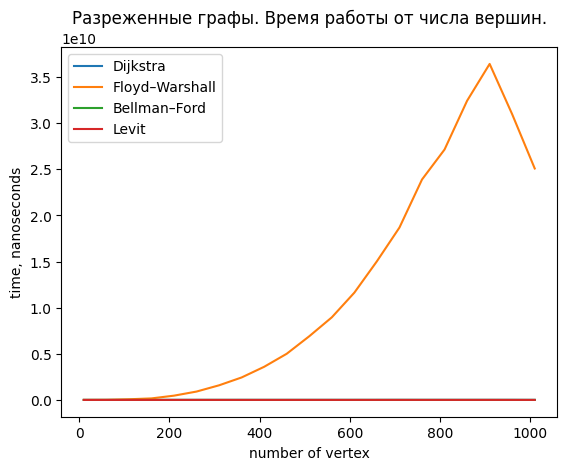

In [286]:
plot_table_1("sparse_graphs.csv", "Разреженные графы. Время работы от числа вершин.")

### График времени работы от числа рёбер для всех графиков

In [287]:
def plot_table_2(file_path, title):
    df = pd.read_csv(file_path, index_col=1) # загрузка таблицы из файла, указываем первый столбец как индекс
    df = df.drop(df.columns[0], axis=1)
    df = df.iloc[:, :-1]
    df.plot(kind='line') # построение графика
    plt.xlabel('number of edges') # подпись оси x
    plt.ylabel('time, nanoseconds') # подпись оси y
    plt.title(title) # заголовок графика
    plt.legend(loc='upper left') # легенда, где находятся линии на графике
    plt.show() # показать график

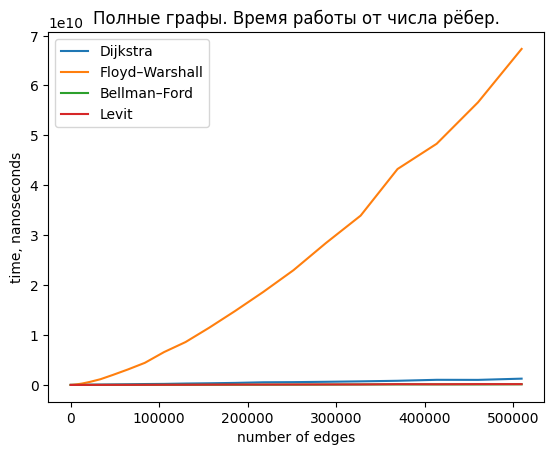

In [288]:
plot_table_2("complete_graphs.csv", "Полные графы. Время работы от числа рёбер.")

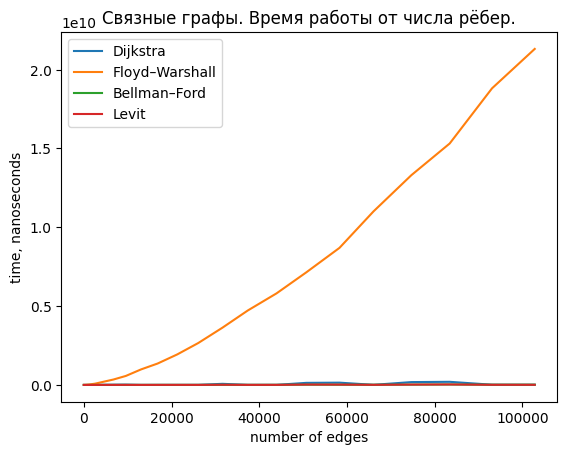

In [289]:
plot_table_2("connected_graphs.csv", "Связные графы. Время работы от числа рёбер.")

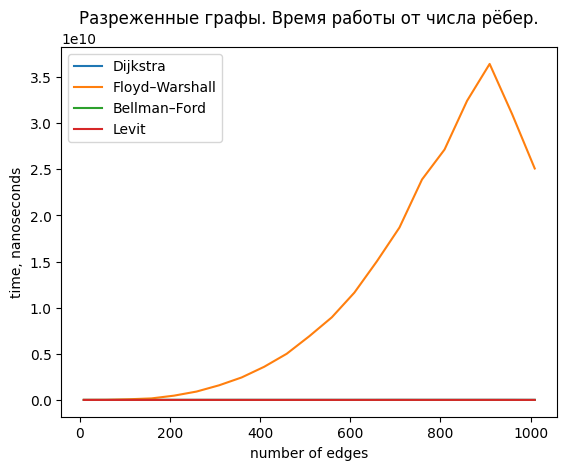

In [290]:
plot_table_2("sparse_graphs.csv", "Разреженные графы. Время работы от числа рёбер.")

Выводы:
После построения данных агрегированных графиков зависимостей как от количества вершин так и от количества рёбер, явно видно, что хуже всех показывет себя алгоритм Флойда-Уоршелла.
Поэтому, я построю дополнительные графики, но уже без этого алгоритма, чтобы внимательнее взглянуть на поведение других алгоритмов.

In [291]:
def plot_table_3(file_path, title):
    df = pd.read_csv(file_path, index_col=0) # загрузка таблицы из файла, указываем первый столбец как индекс
    df = df.drop(df.columns[0], axis=1)
    df = df.drop(df.columns[1], axis=1)
    df = df.iloc[:, :-1]
    df.plot(kind='line') # построение графика
    plt.xlabel('number of vertex') # подпись оси x
    plt.ylabel('time, nanoseconds') # подпись оси y
    plt.title(title) # заголовок графика
    plt.legend(loc='upper left') # легенда, где находятся линии на графике
    plt.show() # показать график

In [292]:
def plot_table_4(file_path, title):
    df = pd.read_csv(file_path, index_col=1) # загрузка таблицы из файла, указываем первый столбец как индекс
    df = df.drop(df.columns[0], axis=1)
    df = df.drop(df.columns[1], axis=1)
    df = df.iloc[:, :-1]
    df.plot(kind='line') # построение графика
    plt.xlabel('number of edges') # подпись оси x
    plt.ylabel('time, nanoseconds') # подпись оси y
    plt.title(title) # заголовок графика
    plt.legend(loc='upper left') # легенда, где находятся линии на графике
    plt.show() # показать график

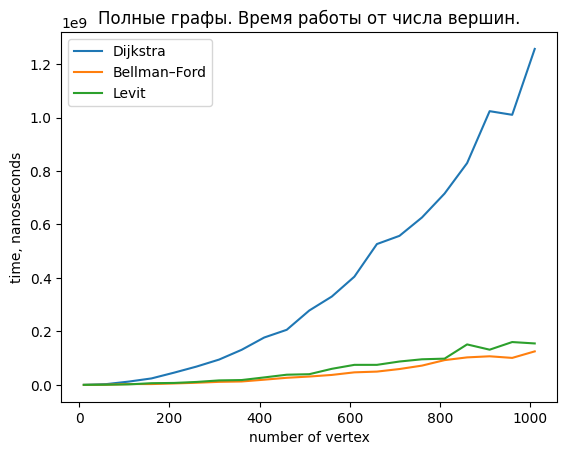

In [293]:
plot_table_3("complete_graphs.csv", "Полные графы. Время работы от числа вершин.")

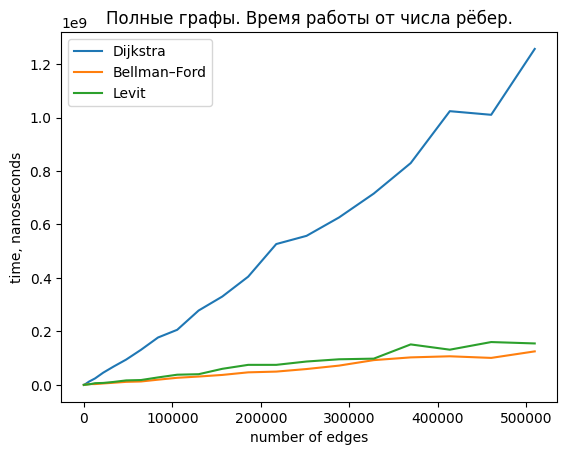

In [294]:
plot_table_4("complete_graphs.csv", "Полные графы. Время работы от числа рёбер.")

Выводы:
1. Алгоритм Дейкстры работает достаточно стабильно, без сильных скачков по времени. Среди данной троицы алогитмов, алгоритм Декстры работает хуже всех.
2. Алгоритм Беллмана-Форда работает достаточно стабильно и гораздо быстрее, чем Дейкстра.
3. Алгоритм Левита примерно по-факту также работает по времени как Беллман-Форд, однако в некоторых местах хуже него.

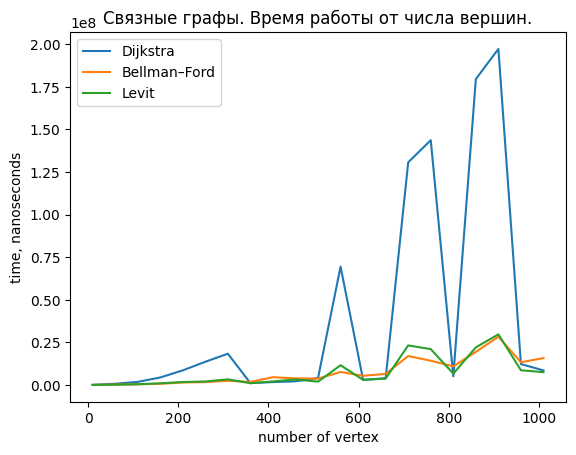

In [295]:
plot_table_3("connected_graphs.csv", "Связные графы. Время работы от числа вершин.")

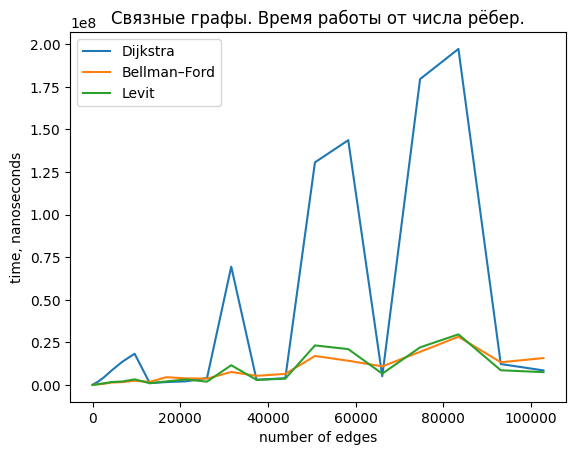

In [296]:
plot_table_4("connected_graphs.csv", "Связные графы. Время работы от числа рёбер.")

Выводы:
1. Алгоритм Дейкстры работает с сильными скачками по времени. Такие скачки здесь вполне понятны: происходят они из-за заданного коэффициента плотности - не все возможные пары вершин имеют рёбра между собой. Именно это приводит к скачкам по времени, поскольку на каждом шаге алгоритм может найти новые ближайшие вершины и обновить расстояния до них. Среди данной троицы алогитмов, алгоритм Декстры работает хуже всех.
2. Алгоритм Беллмана-Форда по-прежнему работает достаточно стабильно и гораздо быстрее, чем Дейкстра.
3. Алгоритм Левита по-прежнему примерно также работает по времени как Беллман-Форд, однако в некоторых местах хуже него.

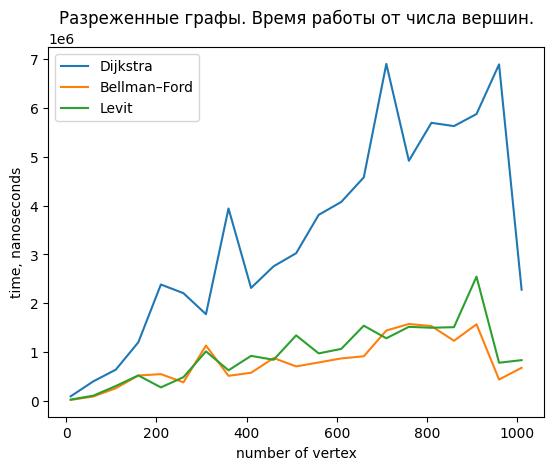

In [297]:
plot_table_3("sparse_graphs.csv", "Разреженные графы. Время работы от числа вершин.")

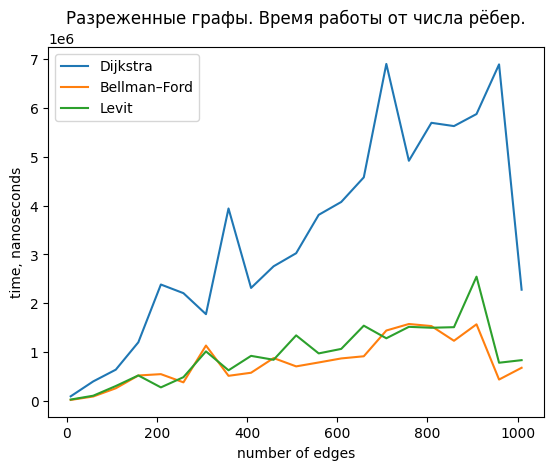

In [298]:
plot_table_4("sparse_graphs.csv", "Разреженные графы. Время работы от числа рёбер.")

Выводы:
1. Алгоритм Дейкстры работает со скачками по времени. Скачки здесь обусловлены ввиду специфичности графа: неоднородности и неравномерности расстояний между вершинами.
2. Алгоритм Беллмана-Форда работает со скачками, причина та же, что и выше. Данный алгоритм гораздо быстрее, чем Дейкстра.
3. Алгоритм Левита работает со скачками, причина та же, что и выше. В некоторых местах отрабатывает хуже Беллмана-Форда.

# Общий вывод:
Я проводила измерения по времени;
Реализовала 4 алгоритма поиска кратчайших путей в графе:
* Алгоритм Дейкстры;
* Алгоритм Флойда-Уоршела;
* Алгоритм Форда-Беллмана;
* Алгоритм Левита

Время выполнения алгоритма сильно зависит от входных данных: от графа, который был сгенерирован:
* Полный граф (с числом вершин от 10 до 1010 (шаг 50))
* Связный граф (с числом вершин от 10 до 1010 (шаг 50)) и коэффициентом
плотности приблизительно 0.4-0.5
* Разреженный граф (дерево) (с числом вершин от 10 до 1010 (шаг 50))


 У нас, при измерении времени, происходит много выбросов, из-за разных причин, в том числе как раз из-за исходных данных. Поэтому необходимо правильно выбирать алгоритм, исходя из типа графа.

Время необходимо усреднять (я усредняла его большим количеством замеров), т.к. другие процессы, происходящие на компьютере в фоновом режиме, могут замедлять время работы алгоритма, которое мы измеряем и т.к. в таком случае, как я и сказала выше, мы получаем усреднённые данные.